### PolMeasJones
#### ProfHuster 20151129
#### Calculates the polarization state measurement technique from AJP
----

In [1]:
import numpy as np
from IPython.display import display, Math, Latex
from sympy import *
def my_display(x):
    display(Math(latex(x)))

### Define a classes for Jones Vectors, Matrices, and Density Matrices

In [2]:
class JVec(Matrix):
    """
    Jones vectors for describing light with pure polarization

    Jones vectors are 2 element complex column vectors describing the polarization
    of light. The elements are [[Ex],[Ey]] where Ex and Ey are the complex
    amplitudes of the electric field vector. The convention is that Ex is horizontal,
    and Ey is vertical. 
    They are oftern normalized such that the incident light beam has
    conj(Ex)*Ex + conj(Ey)Ey=1.

    Attributes:
        All Matrix attributes
    """
    def __new__(cls, *args):
        newobj = Matrix.__new__(cls, *args)
        if newobj.shape != (2, 1):
            raise TypeError("JVec: shape must be (2,1)")
        return newobj

# define functions to return common polarizations
def LHP():
    return JVec([Rational(1),0])
def LVP():
    return JVec([0,Rational(1)])
def LP(theta):
    return JVec([cos(theta),sin(theta)])
def RCP():
    return JVec([cos(pi/4),I*cos(pi/4)])
def LCP():
    return JVec([cos(pi/4),-I*cos(pi/4)])

class JMat(Matrix):
    """
    Jones matrices describing optical elements that change light's E fields
    
    Jones matrices are 2x2 complex matrices that operate on a Jones vector,
    a complex, two element column vector.

    Attributes:
        All Matrix attributes
    """
    def __new__(cls, *args):
        newobj = Matrix.__new__(cls, *args)
        if newobj.shape != (2, 2):
            raise TypeError("JMat: shape must be (2,2)")
        return newobj

def JM_LHP():
    return JMat([[1,0],[0,0]])
def JM_LVP():
    return JMat([[0,0],[0,1]])
def JM_QWP():
    return JMat([[1,0],[0,-I]])
def JM_HWP():
    return JMat([[1,0],[0,-1]])
def JM_WP(phi):
    return JMat([[exp(I*phi/2),0],[0,exp(-I*phi/2)]])
def JM_ROT(theta):
    return JMat([[cos(theta),sin(theta)],[-sin(theta),cos(theta)]])

class JDensity(Matrix):
    """
    A Jones density matrix is an extension of the Jones vectors
    describing partially polarized light
    
    Jones density matrices are 2x2 complex matrices that operate on a Jones vector,
    a complex, two element column vector.

    Attributes:
        All Matrix attributes
    """
    def __new__(cls, *args):
        newobj = Matrix.__new__(cls, *args)
        if newobj.shape != (2, 2):
            raise TypeError("JDensity: shape must be (2,2)")
        return newobj

# Define some common polarization states
def JD_LHP():
    return JDensity(LHP() * LHP().H)
def JD_LVP():
    return JDensity(LVP() * LVP().H)
def JD_RCP():
    return JDensity(RCP() * RCP().H)
def JD_LCP():
    return JDensity(LCP() * LCP().H)
def JD_LP(theta):
    return JDensity(LP(theta) * LP(theta).H)

In [3]:
my_display(JD_LHP())
my_display(JD_LVP())
my_display(JD_RCP())
my_display(JD_LCP())
theta = Symbol("theta", real=True)
my_display(JD_LP(theta))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Define the system for measuring polarization state
The system is a rotating quarter wave plate followed by a linear polarizer.
At least it _should_ be a quarter wave plate, but I will model a non-ideal quarter wave plate by giving it a retardance of $\pi/2 + \epsilon$.

In [4]:
epsilon = Symbol("epsilon", real=True)
WP = JM_WP(pi/2 + epsilon)
theta = Symbol("theta", real=True) # rotation angle of wave plate
MSys = JM_LVP() * JM_ROT(-theta) * WP * JM_ROT(theta)
my_display(MSys)
print MSys

<IPython.core.display.Math object>

Matrix([[0, 0], [exp(I*(epsilon + pi/2)/2)*sin(theta)*cos(theta) - exp(-I*(epsilon + pi/2)/2)*sin(theta)*cos(theta), exp(I*(epsilon + pi/2)/2)*sin(theta)**2 + exp(-I*(epsilon + pi/2)/2)*cos(theta)**2]])


Simplify by hand and re-enter the Matrix

In [5]:
MSys1 = Matrix([[0, 0], \
                [exp(I*(epsilon + pi/2)/2)*sin(theta)*cos(theta) - \
                 exp(-I*(epsilon + pi/2)/2)*sin(theta)*cos(theta), \
                 exp(I*(epsilon + pi/2)/2)*sin(theta)**2 + \
                 exp(-I*(epsilon + pi/2)/2)*cos(theta)**2]])
MSys1a = Matrix([[0, 0], \
                [2*I*sin((epsilon + pi/2)/2) * sin(2*theta)/2, \
                 exp( I*(epsilon + pi/2)/2)*(1-cos(2*theta))/2 + \
                 exp(-I*(epsilon + pi/2)/2)*(1+cos(2*theta))/2
                 ]])
MSys1b = Matrix([[0, 0], \
                [2*I*sin((epsilon + pi/2)/2) * sin(2*theta)/2, \
                 cos((epsilon + pi/2)/2) - I*sin((epsilon + pi/2)/2)*cos(2*theta) \
                 ]])
my_display(MSys1a)
my_display(MSys1b)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Jones vector calculations
Now calculate the output using right circularly polarized input for Jones vectors

In [6]:
JV_Out = MSys1b * RCP()
I_Out = (JV_Out.H * JV_Out)[0]
my_display(simplify(I_Out.expand()))

<IPython.core.display.Math object>

Simplify for __RCP__

In [7]:
I_RCP = Rational(1,2) + Rational(1,2)*sin(2*theta)*cos(epsilon)
my_display(I_RCP)

<IPython.core.display.Math object>

__LCP__ now

In [8]:
JV_Out = MSys1b * LCP()
I_Out = (JV_Out.H * JV_Out)[0]
my_display(simplify(I_Out.expand()))

<IPython.core.display.Math object>

In [9]:
I_LCP = Rational(1,2) - Rational(1,2)*sin(2*theta)*cos(epsilon)
my_display(I_LCP)

<IPython.core.display.Math object>

__LVP__ next

In [10]:
JV_Out = MSys1b * LVP()
I_Out = (JV_Out.H * JV_Out)[0]
my_display(simplify(I_Out.expand()))
print simplify(I_Out.expand())

<IPython.core.display.Math object>

(sin(epsilon) + 1)*cos(2*theta)**2/2 - sin(epsilon)/2 + 1/2


In [11]:
I_LVP = ((sin(epsilon) + 1)/2) * (1+cos(4*theta))/2 - sin(epsilon)/2 + Rational(1,2)
my_display(I_LVP.expand())

<IPython.core.display.Math object>

Finally __LHP__

In [12]:
JV_Out = MSys1b * LHP()
I_Out = (JV_Out.H * JV_Out)[0]
my_display(simplify(I_Out.expand()))
print simplify(I_Out.expand())

<IPython.core.display.Math object>

(sin(epsilon) + 1)*sin(2*theta)**2/2


In [13]:
I_LHP = (sin(epsilon) + 1)*((1 - cos(4*theta))/2)/2
my_display(simplify(I_LHP))

<IPython.core.display.Math object>

#### Plot the output intensities for these polarization states

In [14]:
from sympy.plotting import plot
I_Plot1 = I_RCP.subs([(epsilon,0.0)])
I_Plot2 = I_LCP.subs([(epsilon,0.0)])
I_Plot3 = I_LVP.subs([(epsilon,0.0)])
I_Plot4 = I_LHP.subs([(epsilon,0.0)])
my_display(simplify(I_Plot1.expand()))
p1 = plot(I_Plot1,(theta,0,6.28), line_color=(1,0,0), show=False, legend=True, \
          label="RCP", \
    title="Output Different Polarization States", \
    xlabel="Angle (rad)", \
    ylabel="Intensity (arb)")
p2 = plot(I_Plot2,(theta,0,6.28), line_color=(0,1,0), label="LCP", show=False)
p1.extend(p2)
p2 = plot(I_Plot3,(theta,0,6.28), line_color=(0,0,1), label="LVP", show=False)
p1.extend(p2)
p2 = plot(I_Plot4,(theta,0,6.28), line_color=(0,1,1), label="LHP", show=False)
p1.extend(p2)
p1.show()

<IPython.core.display.Math object>

### Calculations using Jones density matrices

In [15]:
JV_Out = MSys1b * RCP()
I_Out = (JV_Out.H * JV_Out)[0]
my_display(simplify(I_Out.expand()))

<IPython.core.display.Math object>

In [16]:
lcp = JD_LCP()
my_display(lcp)
outLcp = lcp * MSys1b.H * MSys1b
IOutLcp = outLcp.trace()
a = simplify(IOutLcp.expand())
my_display(a)
my_display("It\ matches!!")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Now calculate using partially polarized light
This example is 1/4 left circularly polarized, 1/2 right circularly polarized, and 1/4 linearly polarized at 45deg.

In [28]:
lightIn = Rational(1,4) * JD_LCP() + Rational(1,2) * JD_RCP() + Rational(1,4) * JD_LP(pi/4)
my_display(lightIn)
outPartLcp = lightIn * MSys1b.H * MSys1b
IOutPart = outPartLcp.trace()
a = simplify(IOutPart.expand())
my_display(a)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Now plot them

In [31]:
%matplotlib inline

<IPython.core.display.Math object>

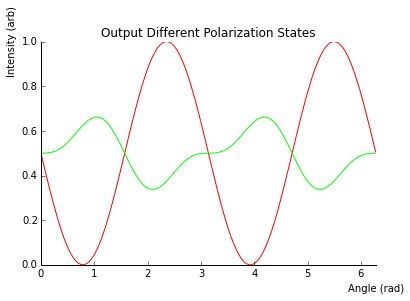

In [32]:
I_Plot1 = IOutLcp.subs([(epsilon,0.0)])
my_display(simplify(I_Plot1.expand()))
p1 = plot(I_Plot1,(theta,0,6.28), line_color=(1,0,0), show=False, legend=False, \
          label="LCP", \
    title="Output Different Polarization States", \
    xlabel="Angle (rad)", \
    ylabel="Intensity (arb)")
#
I_Plot2 = IOutPart.subs([(epsilon,0.0)])
p2 = plot(I_Plot2,(theta,0,6.28), line_color=(0,1,0), label="Partial LCP", show=False)
p1.extend(p2)
p1.show()